### Problem Statement
1. Predicting exit of employess
2. Dataset is known as HR Data
3. Common application in HR analytics companies

<hr>

In [1]:
import pandas as pd
import numpy as np

In [2]:
emp_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt')

In [3]:
emp_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
emp_data.rename(columns={'sales':'department'}, inplace=True)

In [5]:
emp_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### About the data
* Target column is 'left'
* Feature columns are everything but 'left'

### Objective
* Building a ML model which when fed with feature data, can return target('left')

In [6]:
target = emp_data['left']

In [9]:
feature_cols = list(emp_data.columns)

In [11]:
feature_cols.remove('left')

In [12]:
feature_cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'department',
 'salary']

In [13]:
feature_data = emp_data[feature_cols]

In [16]:
feature_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


* All we did so far is seprating feature & target

### First important step is separating feature & target data. We have done that so far.

### Important observations
* Feature data is hetrogenous in nature. 
* It consists of numerical, ordinal & nominal data. 
* This will need preprocessing.

* Handling department. Since, department is nominal data. We are using LabelBinarizer

In [18]:
feature_data.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [19]:
from sklearn.preprocessing import LabelBinarizer

In [20]:
lb = LabelBinarizer()

In [21]:
lb.fit(feature_data.department)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [23]:
department_tf = lb.transform(feature_data.department)

In [24]:
lb.classes_

array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'], dtype='<U11')

In [26]:
department_tf.shape

(14999, 10)

In [28]:
department_tf[:3]

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

* Handling salary. It's ordinal. We will be using LabelEncoder

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()

In [31]:
le.fit(feature_data.salary)

LabelEncoder()

In [33]:
salary_tf = le.transform(feature_data.salary)

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

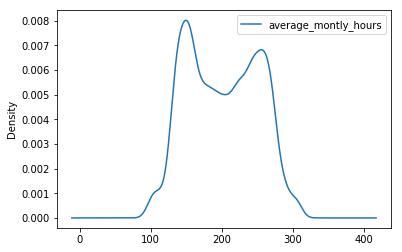

In [35]:
feature_data[['average_montly_hours']].plot.kde()

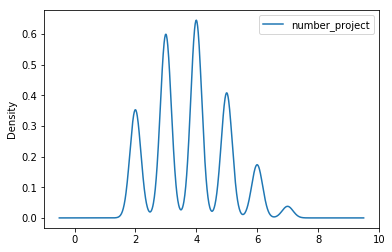

In [36]:
feature_data[['number_project']].plot.kde()

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
mm = MinMaxScaler()

In [41]:
mm_data = feature_data[['number_project','average_montly_hours','time_spend_company']]

In [43]:
mm_data_tf = mm.fit_transform(mm_data)

In [46]:
rest_tf = feature_data[['satisfaction_level','last_evaluation','Work_accident','promotion_last_5years']]

* Q. What have we achieved so far?
* A. We have taken care of all the transformations.

### We now need to combine all the transformed data

In [56]:
feature_tf = np.hstack([rest_tf,mm_data_tf, department_tf, salary_tf.reshape(-1,1)])

In [55]:
salary_tf.reshape(-1,1)[:3]

array([[1],
       [2],
       [2]])

### All the steps earliers was to get data ready for machine learning

### Next Steps
* Split the data into train & test dataset
* Using train dataset, we will train our nearestneighbour classifier
* Using test dataset, we will find accuracy of the model

In [58]:
from sklearn.model_selection import train_test_split

* Splitting data into train & test dataset. 75-25 ratio

In [59]:
trainX, testX, trainY, testY = train_test_split(feature_tf, target)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knnc = KNeighborsClassifier()

In [62]:
knnc.fit(trainX,trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [63]:
knnc.score(testX,testY)

0.9410666666666667

In [70]:
knnc = KNeighborsClassifier(n_neighbors=2)

In [71]:
knnc.fit(trainX,trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [72]:
knnc.score(testX,testY)

0.9605333333333334

### Using the model for prediction
* Feature data should be similarly pre processed as your training data

In [73]:
knnc.predict(testX[:1])

array([1])

In [74]:
testX[:1]

array([[0.36      , 0.54      , 0.        , 0.        , 0.        ,
        0.26635514, 0.125     , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 2.        ]])

In [75]:
testX[:1]

array([[0.36      , 0.54      , 0.        , 0.        , 0.        ,
        0.26635514, 0.125     , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 2.        ]])

In [83]:
feature_data.iloc[0].values

array([0.38, 0.53, 2, 157, 3, 0, 0, 'sales', 'low'], dtype=object)

In [85]:
t_dept_tf = lb.transform(['sales'])

In [92]:
t_dept_tf

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [87]:
t_salary_tf = le.transform(['low'])

In [88]:
t_salary_tf

array([1])

In [91]:
t_mm_data_tf = mm.transform([[2,157,3]])

In [93]:
t_mm_data_tf

array([[0.        , 0.28504673, 0.125     ]])

In [102]:
r = np.array([[0.38, 0.53, 0,0, 0, 0.28504673, 0.125, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]])

In [103]:
r.shape

(1, 18)

In [104]:
testX.shape

(3750, 18)

In [105]:
knnc.predict(r)

array([1])